<a href="https://colab.research.google.com/github/Jaypardeshii/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

### **MODULE** - ML Regression

## <b> Problem Statement </b>

Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


In [1]:
# Date : year-month-day
# Rented Bike count - Count of bikes rented at each hour
# Hour - Hour of he day
# Temperature-Temperature in Celsius
# Humidity - %
# Windspeed - m/s
# Visibility - 10m
# Dew point temperature - Celsius
# Solar radiation - MJ/m2
# Rainfall - mm
# Snowfall - cm
# Seasons - Winter, Spring, Summer, Autumn
# Holiday - Holiday/No holiday
# Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# **Importing Libraries**

In [2]:
# Importing the  common libraries

import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime     #importing for date time application
import datetime as dt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from graphviz import Source
from IPython.display import SVG
from IPython.display import display

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

# **Importing Dataset**

In [4]:
#mount drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# read data

path = '/content/drive/MyDrive/Datasets/SeoulBikeData.csv'
bikes_data = pd.read_csv(path, encoding = 'unicode_escape')

# **Dataset Overview**

Taking a quick glance of our data

In [6]:
# First 5 rows

bikes_data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
# Last 5 rows

bikes_data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [8]:
# dimensions of the dataset 

bikes_data.shape

(8760, 14)

In [9]:
# dataset description

bikes_data.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [10]:
# dataset detailed information

bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

By looking at Rented Bike Count,we get mean is more than median. so there can be outliers.

## **Data Manipulation**

In [11]:
# checking columns

bikes_data.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [12]:
#rename column

bikes_data = bikes_data.rename(columns={'Rented Bike Count': 'Rented_Bike_Count', 
                        'Temperature(°C)': 'Temperature',
                        'Humidity(%)': 'Humidity', 
                        'Wind speed (m/s)': 'Wind_speed', 
                        'Visibility (10m)': 'Visibility', 
                        'Dew point temperature(°C)': 'Dew_point_temperature', 
                        'Solar Radiation (MJ/m2)': 'Solar_Radiation', 
                        'Rainfall(mm)': 'Rainfall', 
                        'Snowfall (cm)': 'Snowfall',
                        'Functioning Day': 'Functioning_Day'})

### **Categorical features**

In [13]:
# data types

bikes_data.dtypes

Date                      object
Rented_Bike_Count          int64
Hour                       int64
Temperature              float64
Humidity                   int64
Wind_speed               float64
Visibility                 int64
Dew_point_temperature    float64
Solar_Radiation          float64
Rainfall                 float64
Snowfall                 float64
Seasons                   object
Holiday                   object
Functioning_Day           object
dtype: object

In [14]:
print(bikes_data.dtypes.astype(str).value_counts())

float64    6
object     4
int64      4
dtype: int64


In [15]:
# listing all the date or diffrent sesaons and holiday and functioning day

print(bikes_data['Seasons'].unique())
print(bikes_data['Holiday'].unique())
print(bikes_data['Functioning_Day'].unique())
print(bikes_data['Date'].unique())

['Winter' 'Spring' 'Summer' 'Autumn']
['No Holiday' 'Holiday']
['Yes' 'No']
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'


There are 14 columns. 10 are numerical columns and 4 are categorical columns.


## **Data Cleansing**

In [16]:
# checking duplicates

len(bikes_data[bikes_data.duplicated()])

0

In [17]:
# checking null entries
bikes_data.isna()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8756,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8757,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8758,False,False,False,False,False,False,False,False,False,False,False,False,False,False


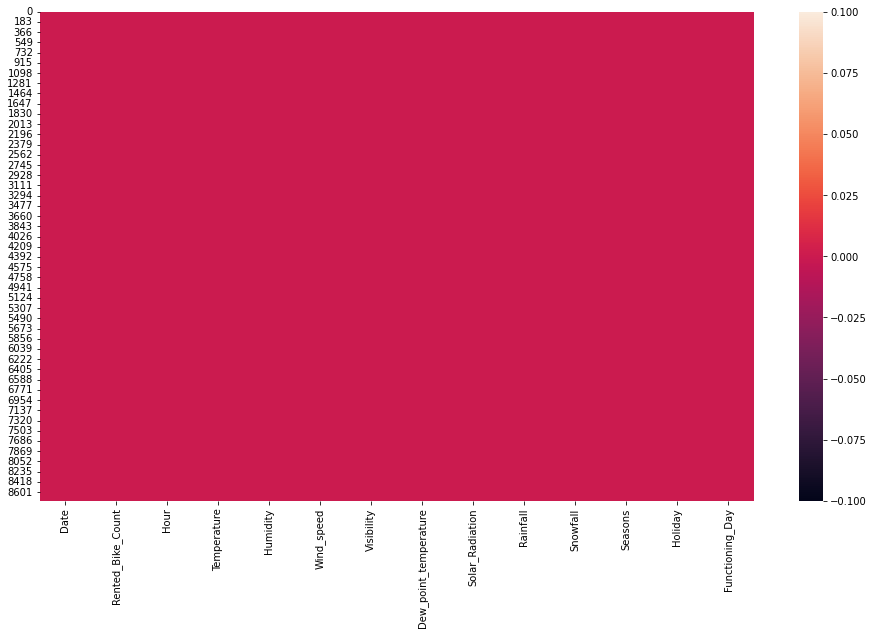

In [18]:
# visualize missing value using heatmap 

plt.figure(figsize=(16,9))
sns.heatmap(bikes_data.isnull())

In [19]:
# overall null values

bikes_data.isna().sum()

Date                     0
Rented_Bike_Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
dtype: int64

In [20]:
# total null values
bikes_data.isna().sum().sum()

0

There are no NULL values and no DUPLICATES

## **Extracting Features from date**

In [21]:
# extracting data from date format

bikes_data['Date']=pd.to_datetime(bikes_data['Date'])
bikes_data['Year'] = pd.DatetimeIndex(bikes_data['Date']).year
bikes_data['Day'] = pd.DatetimeIndex(bikes_data['Date']).day
bikes_data['Month']= pd.DatetimeIndex(bikes_data['Date']).month
bikes_data['weekday']=pd.DatetimeIndex(bikes_data['Date']).weekday

'Date' column have multiple features.Extraction of it can be useful.

In [22]:
# data after date time extraction

bikes_data.head()

,Date,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Year,Day,Month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3


In [23]:
#weekday is in range 0-6, so we need to make it to normal 1-7

bikes_data['weekday'] = np.array(bikes_data['weekday'])+1
display(bikes_data['weekday'].unique())

array([4, 7, 3, 5, 1, 6, 2])

In [24]:
Rented_bikes_per_Weekday= pd.DataFrame(bikes_data['Rented_Bike_Count'].groupby(by=bikes_data['weekday']).sum()).reset_index().sort_values("weekday", ascending=True)
Rented_bikes_per_Weekday

,weekday,Rented_Bike_Count
0,1,863563
1,2,862877
2,3,908871
3,4,928267
4,5,898966
5,6,911475
6,7,798295


In [25]:
# read the data for the year

bikes_data['Year'].value_counts()

2018    8016
2017     744
Name: Year, dtype: int64

In [26]:
# year month count 

bikes_data.groupby(['Year','Month']).agg({'Rented_Bike_Count':['sum']}).reset_index()

,Year,Month,Rented_Bike_Count
,,,sum
0,2017,1,9539
1,2017,2,8523
2,2017,3,7222
3,2017,4,8729
4,2017,5,8307
5,2017,6,6669
6,2017,7,8549
7,2017,8,8032
8,2017,9,7233


In [27]:
bikes_data['Months_string'] = bikes_data['Month'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})

# **EDA**

In [28]:
bikes_data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Year',
       'Day', 'Month', 'weekday', 'Months_string'],
      dtype='object')

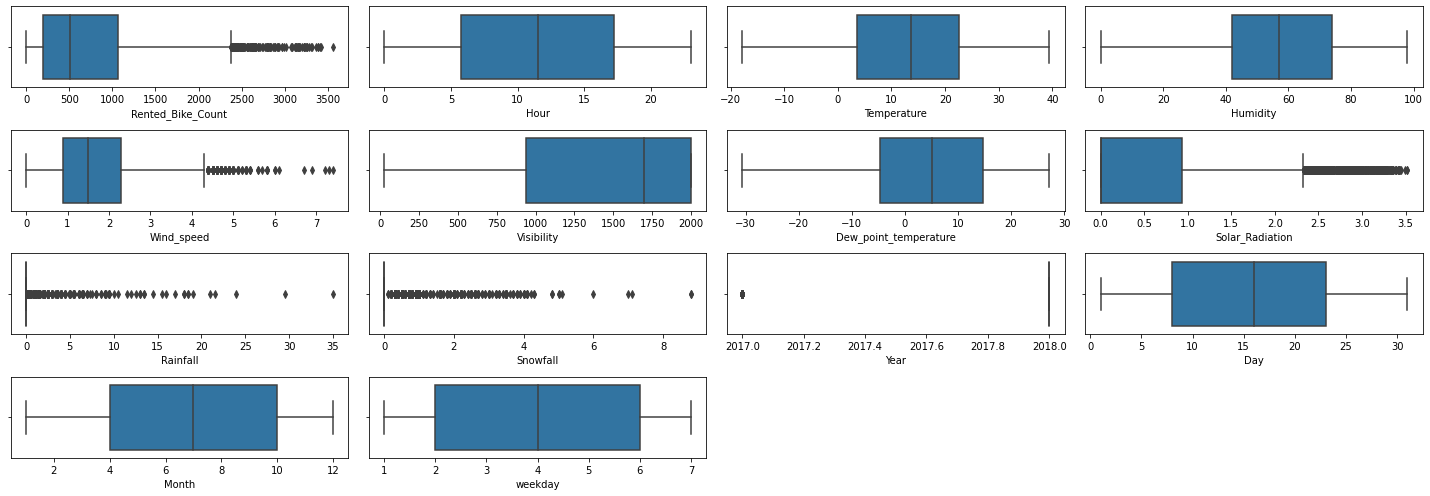

In [29]:
# Dealing with outliers using boxplot

import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num_it = 1 

for col in bikes_data.describe().columns:
    plt.subplot(6,4,num_it)
    sns.boxplot(bikes_data[col])
    num_it+=1
    
plt.tight_layout()

Rented Bike count contains outliers. Wind Speed, Solar Radiation, Rainfall, and Snowfall contains outliers which wont be a problem

Text(0.5, 1.0, 'Season wise Rented Bike %')

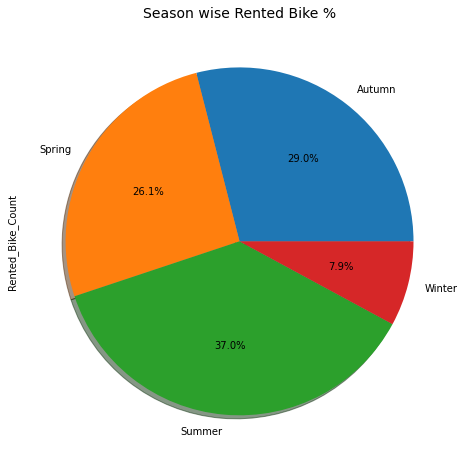

In [30]:
# Season wise Rented Bike

sdf=bikes_data.groupby('Seasons').sum()
sdf['Rented_Bike_Count'].plot(kind='pie',autopct='%1.1f%%',figsize=(15,8), shadow=True)
plt.title('Season wise Rented Bike %',fontsize=14)

We can clearly see that there is less demand of rented bike during winter season

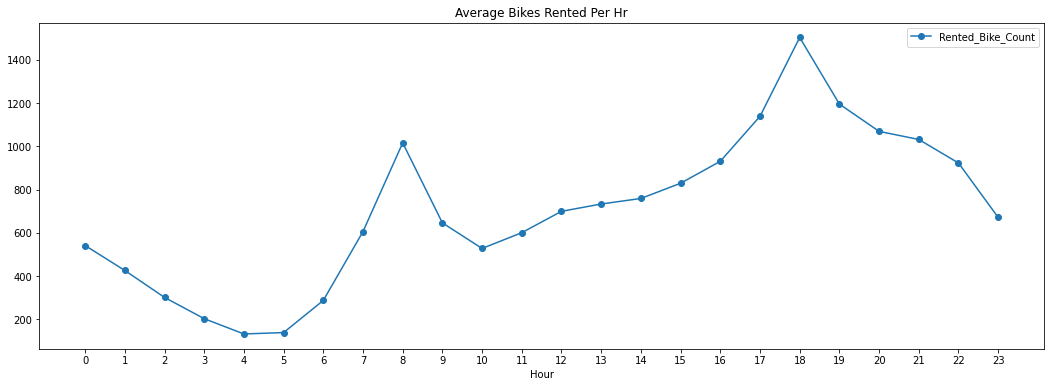

In [31]:
# Average Bikes Rented Per Hr

rent_hr = bikes_data.groupby('Hour')['Rented_Bike_Count'].mean()
plt.figure(figsize=(18,6))
a=rent_hr.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(rent_hr)));

High rise of Rented Bikes from 8:00 a.m to 9:00 p.m means people prefer rented bike during rush hour.

We can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand

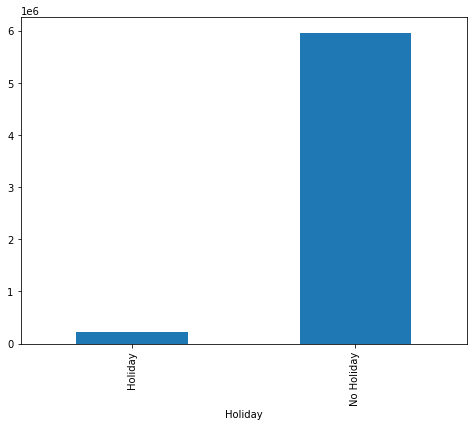

In [32]:
# holiday vs no holiday

df_holi = bikes_data.groupby('Holiday').sum()['Rented_Bike_Count']
fig, ax = plt.subplots(figsize=(8,6))
df_holi.plot(kind='bar', ax=ax)

In [33]:
# dataframe containing the count of bikes rented in differant intensities of rainfall

df_rain = pd.DataFrame(bikes_data.groupby('Rainfall')['Rented_Bike_Count'].sum())
df_rain.reset_index(inplace=True)
df_rain.head()

,Rainfall,Rented_Bike_Count
0,0.0,6086009
1,0.1,15179
2,0.2,3706
3,0.3,1401
4,0.4,2147


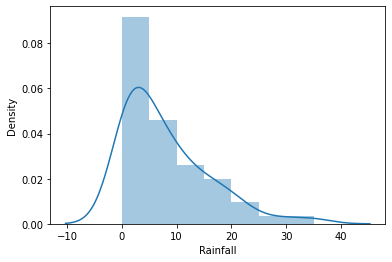

In [34]:
#distribution of bike rentals according to rainfall intensity

sns.distplot(df_rain['Rainfall'])

Above plot shows that people tend to rent bikes when there is no or less rainfall.

In [35]:
#Extracting categorical features

categorical_features= bikes_data.select_dtypes(include='object')

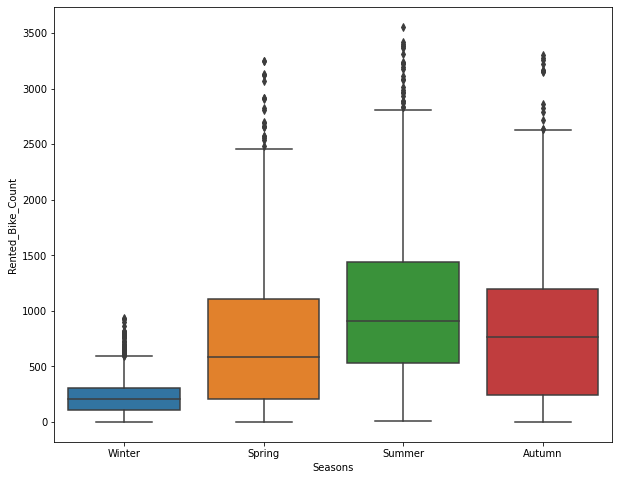

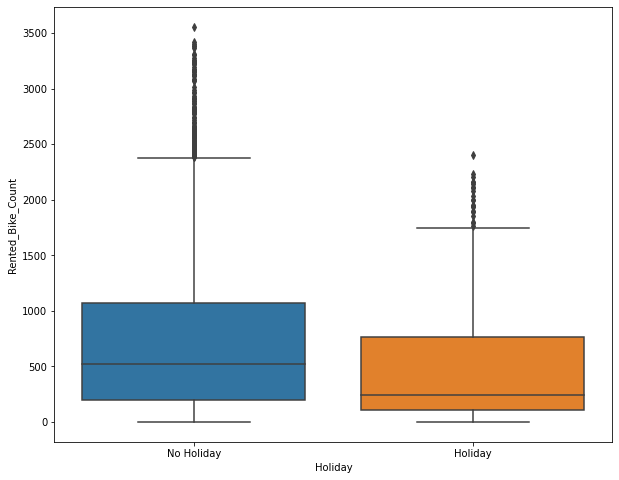

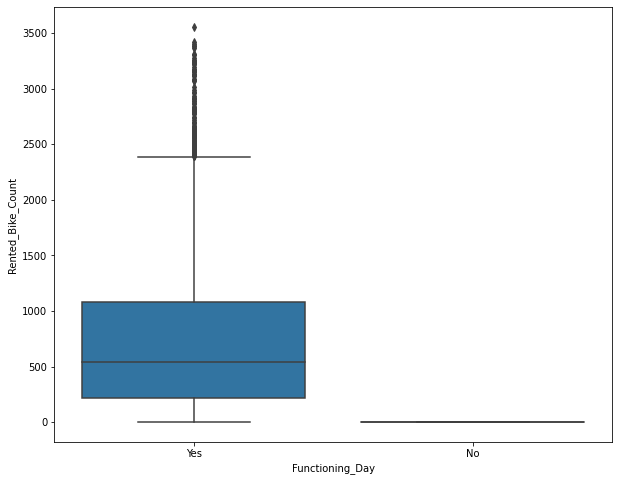

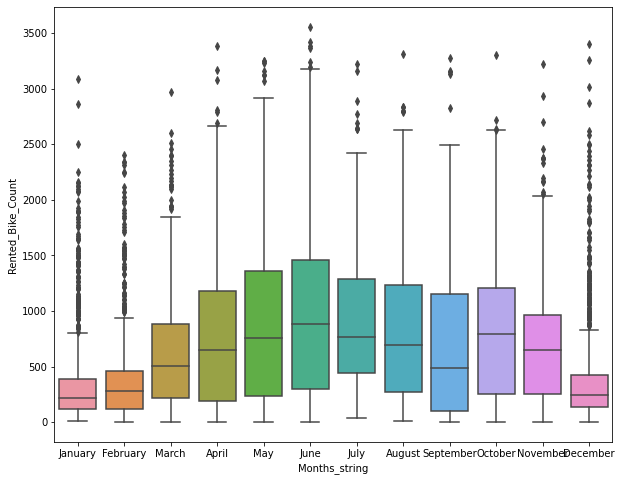

In [36]:
#ploting Box plot to visualize and trying to get information from plot

for col in categorical_features:
  plt.figure(figsize=(10,8))
  sns.boxplot(x=bikes_data[col],y=bikes_data["Rented_Bike_Count"])
  plt.show()

Less demand on winter seasons

Sligthly Higher demand during Non holidays

Almost no demnad on non functioning day

In [37]:
bikes_data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Year',
       'Day', 'Month', 'weekday', 'Months_string'],
      dtype='object')

In [38]:
#checking counts of functioning day

bikes_data['Functioning_Day'].value_counts()

Yes    8465
No      295
Name: Functioning_Day, dtype: int64

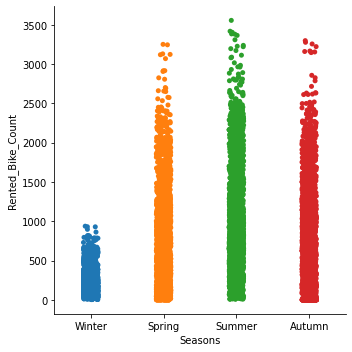

In [39]:
#ploting cat plot for more info

sns.catplot(x='Seasons',y='Rented_Bike_Count',data=bikes_data)

We can clearly see that there is less demand of rented bike during winter season

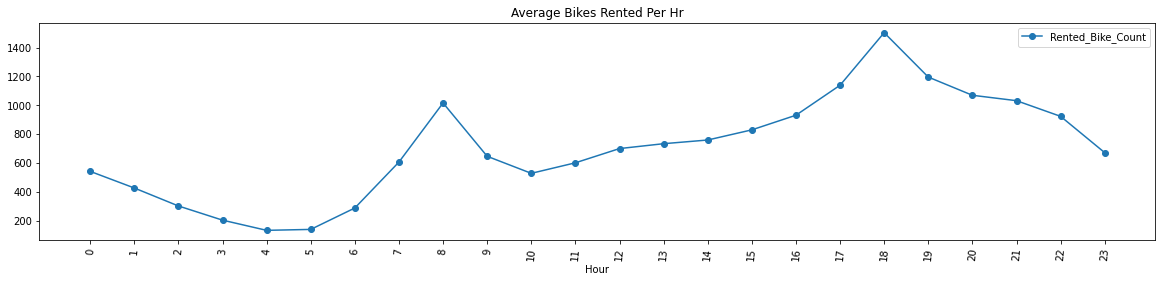

In [40]:
#ploting line graph
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = bikes_data.groupby('Hour')['Rented_Bike_Count'].mean()

# plot average rent over time(hrs)
plt.figure(figsize=(20,4))
a=avg_rent_hrs.plot(legend=True,marker='o',title="Average Bikes Rented Per Hr")
a.set_xticks(range(len(avg_rent_hrs)));
a.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85);


High rise of Rented Bikes from 8:00 a.m to 9:00 p.m means people prefer rented bike during rush hour.

We can clearly see that demand rises most at 8 a.m and 6:00 p.m so we can say that that during office opening and closing time there is much high demand.

<Figure size 2000x1600 with 0 Axes>

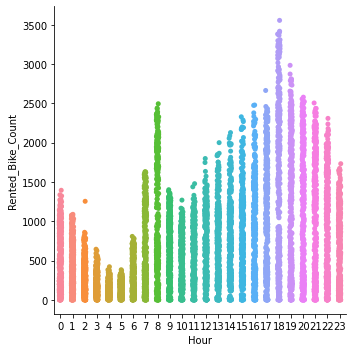

<Figure size 2000x1600 with 0 Axes>

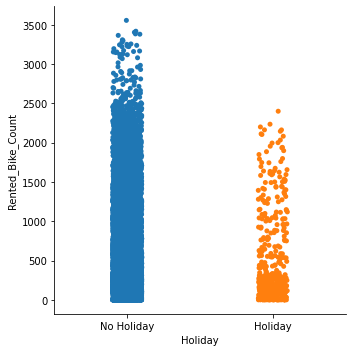

<Figure size 2000x1600 with 0 Axes>

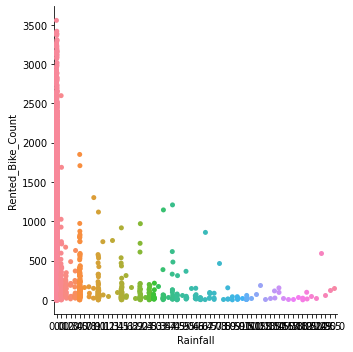

<Figure size 2000x1600 with 0 Axes>

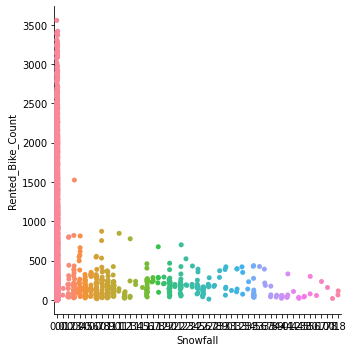

In [41]:
# ploting cat plot on some feature to get more information

feature_list=["Hour","Holiday",'Rainfall','Snowfall']
for feature in feature_list:
  plt.figure(figsize=(10,8),dpi=200)
  sns.catplot(x=feature,y='Rented_Bike_Count',data=bikes_data)
  plt.show()

**From hour v/s rented bike**

we can clearly see there is high demand of Rented bike between the office hours.

**From working-nonworking v/s rented bike**

As cleared from 2nd plot working days has comparatively high demand of rented bike as compared to non working day

**From Rainfall v/s rented bike**

we can see that if Rainfall increase demand of Rented Bike Decreases

**From Snowfall v/s rented bike**

we can see that if Snowfall increase demand of Rented Bike Decreases

In [42]:
import plotly.express as px

In [43]:
#line plot for the month_year group

month_year_group= bikes_data.groupby(by=['Month','Months_string','Year']).agg({'Rented_Bike_Count':'sum'}).reset_index()
px.line(month_year_group,y= 'Rented_Bike_Count',x= 'Months_string',color= 'Year',title='Total Rented Bikes in 2017 and 2018 on monthly basis',width=1000, height=500)

Total Rented Bikes in year 2017 & 2018 on monthly basis

In [44]:
#bar plot for diffrent year

px.bar(month_year_group,y= 'Rented_Bike_Count',x='Months_string' ,facet_row= 'Year',title='Total Rented Bikes on monthly basis in 2017 and 2018',width=800, height=600)


As we can see from above plot,
In 2017 ,Rented bike count was very low.
In 2018,we see sharp increment in rented bike count.
Highest count in rented bike is in june,july & may(2018).

## **Checking Distribution of Dependent variable**

In [45]:
# histogram  plot for the rented bike and year
px.histogram(bikes_data, x="Rented_Bike_Count",marginal="violin",color='Year')

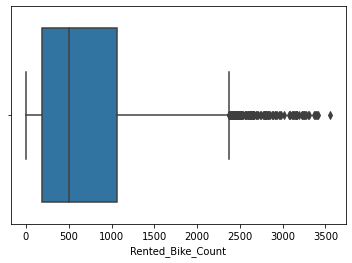

In [46]:
sns.boxplot(x = bikes_data['Rented_Bike_Count'])

In [47]:
#square root transformation

px.histogram(bikes_data, x=np.sqrt(bikes_data["Rented_Bike_Count"]),color='Year',marginal="violin", title='Probalility density of Square root transformation of Number of Rented Bikes',histnorm='probability density')

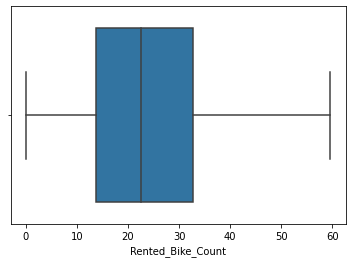

In [48]:
sns.boxplot(x = np.sqrt(bikes_data["Rented_Bike_Count"]))

 Our Model works best when we have normal distribution. Normal distribution for model building as it makes math easier. 

## **Exploring Categorical Variables**

In [49]:
bikes_data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Year',
       'Day', 'Month', 'weekday', 'Months_string'],
      dtype='object')

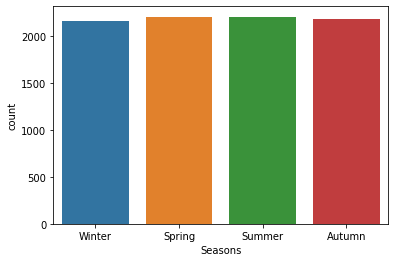

In [50]:
#count plot for diffrent seasons
sns.countplot(x ='Seasons', data = bikes_data)

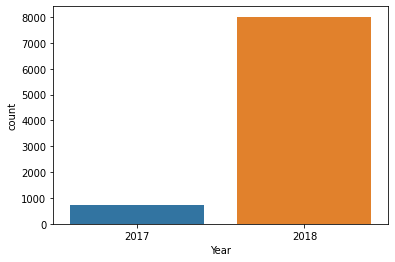

In [51]:
#comment for countplot for year
sns.countplot(x ='Year', data = bikes_data)


## **Finding relation using Bar Plot**

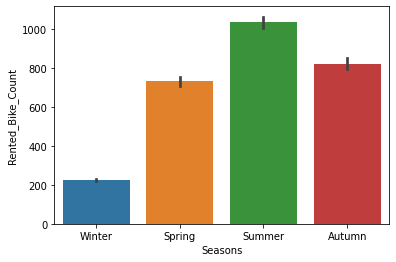

In [52]:
#Finding relation betwwen seasons and rented bike count. telling us rented bike count on that season.
# sns.set_style('darkgrid')
sns.barplot(x ='Seasons', y ='Rented_Bike_Count', data = bikes_data, palette ='tab10')


Rented bikes count is higher in summer & are lesser in winter season

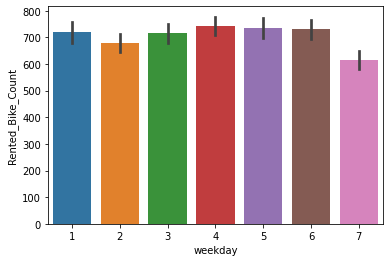

In [53]:
#plot for the rented bike forweekday
sns.barplot(x ='weekday', y ='Rented_Bike_Count', data = bikes_data, palette ='tab10')


There is consistency

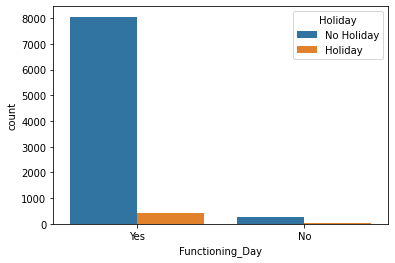

In [54]:
#holiday or not holiday plot
sns.countplot(x ='Functioning_Day',hue = 'Holiday', data = bikes_data)


All holidays are falling into functional days

## **Exploring Numerical Variables**

In [55]:
bikes_data.columns

Index(['Date', 'Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'Year',
       'Day', 'Month', 'weekday', 'Months_string'],
      dtype='object')

In [56]:
#selecting numerical features
numerical_features = ['Hour', 'Temperature', 'Humidity',
       'Wind_speed', 'Visibility', 'Dew_point_temperature', 'Solar_Radiation',
       'Rainfall', 'Snowfall' ]

In [57]:
# List of colors in the color palettes
rgb_values = sns.color_palette("bright")

In [58]:
# Map continents to the colors
color_map = dict(zip(numerical_features, rgb_values))

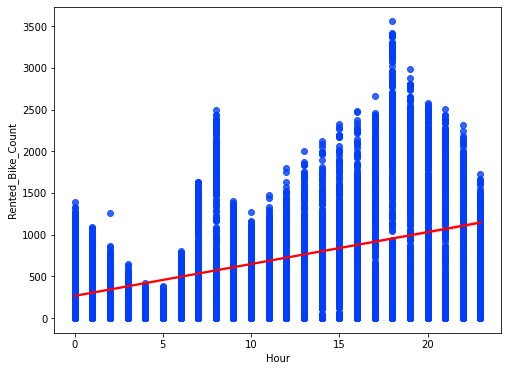

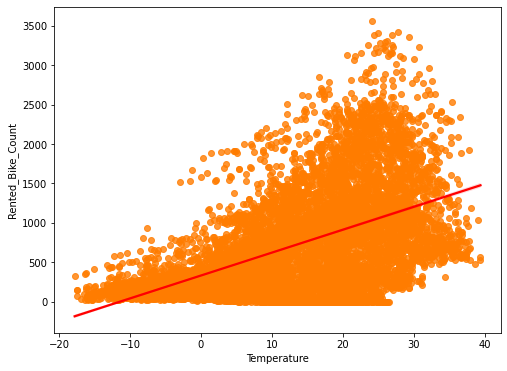

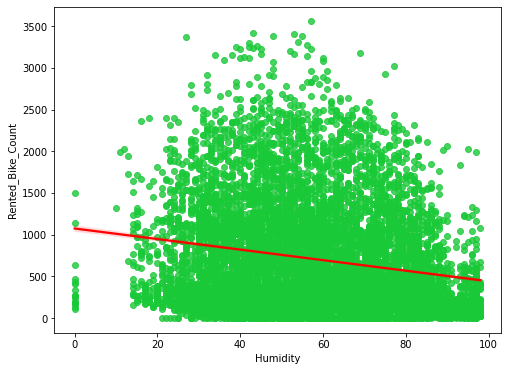

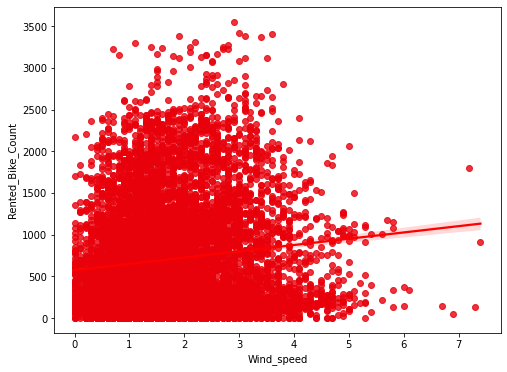

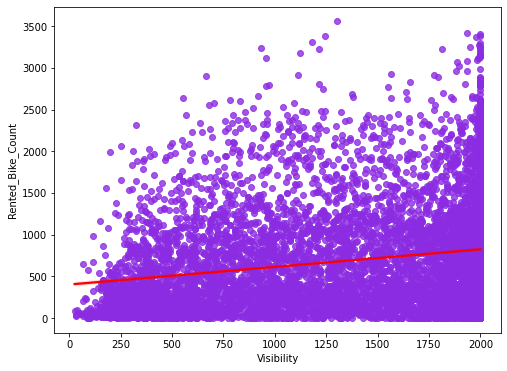

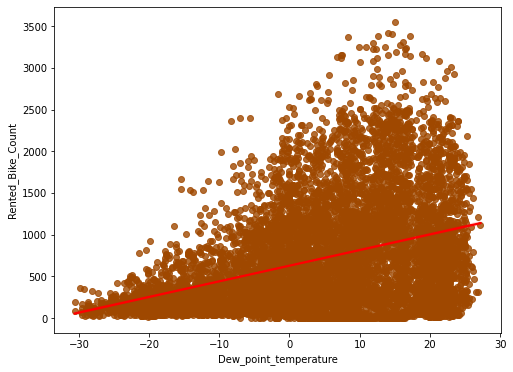

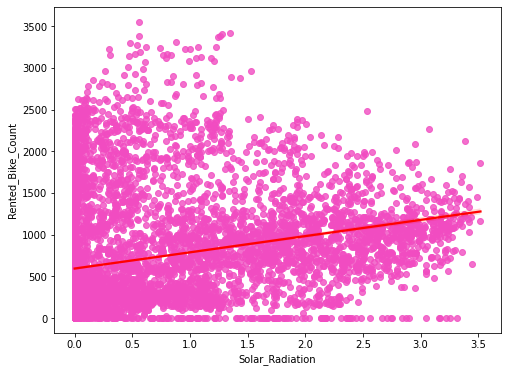

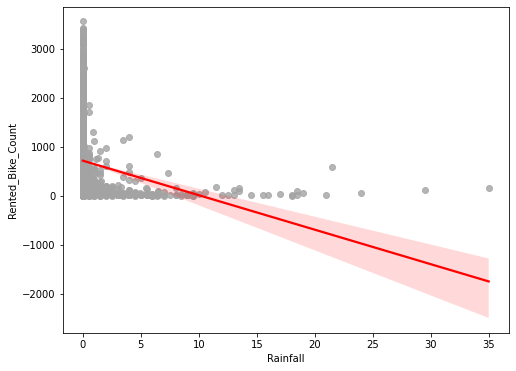

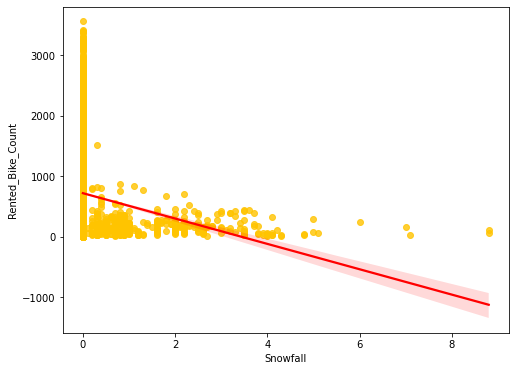

In [59]:
#plot for numerical feature
plt.rcParams['figure.figsize'] = (8, 6)
for col, key in zip(numerical_features, color_map):
  plt.figure()
  sns.regplot(x=bikes_data[col], y = bikes_data['Rented_Bike_Count'],scatter_kws={"color": color_map[key]}, line_kws={"color": "Red"})

## Effects of numerical feature in Rented bikes count




* **Hour**- Demand of bikes is more in morning(7 to 11)& in evening from (4 to 9).
* **Temperature**- Rented bike count is more used in temperature range having 20 to 30.
* **Humidity**- people prefer bikes when there is less humidity.

* **Wind speed**- there is less effect of wind speed in our data.
   
* **Visibility**- there is less effect .but we know visibility is positively related to bikes count.

* **Snowfall& Rain**- people less prefer bikes in snowfall& rain.




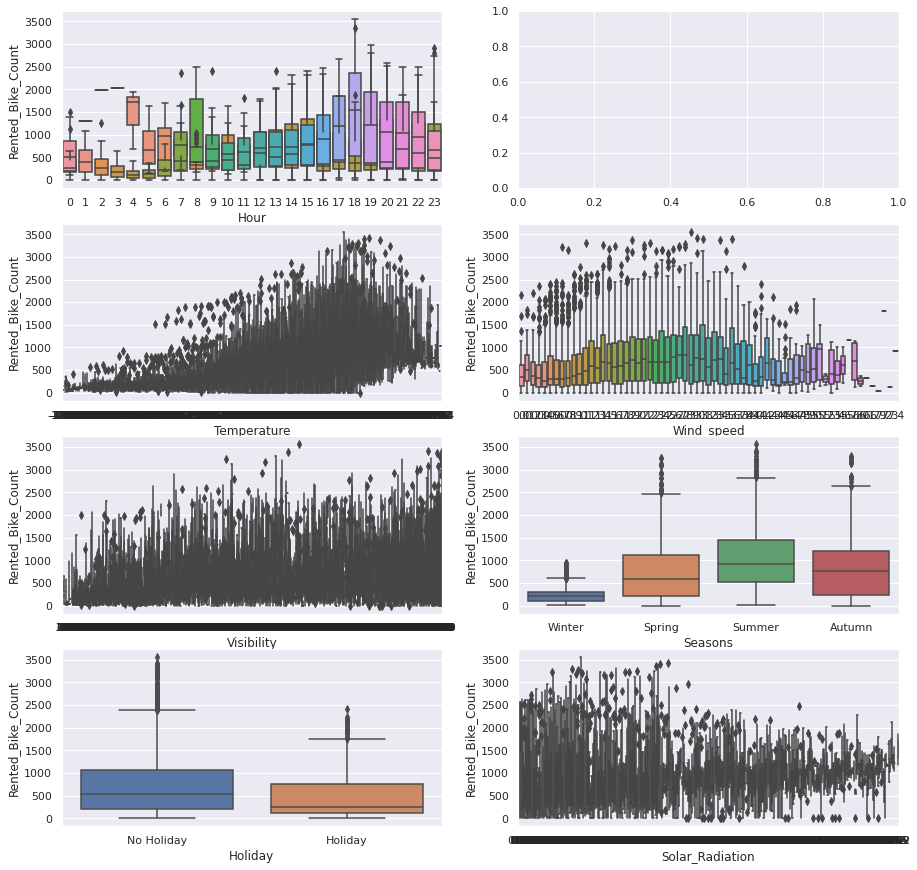

In [60]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(15, 15)

sns.boxplot(data=bikes_data,y="Rented_Bike_Count",x="Humidity",orient="v",ax=axes[0][0])
sns.boxplot(data=bikes_data,y="Rented_Bike_Count",x="Hour",orient="v",ax=axes[0][0])
sns.boxplot(data=bikes_data,y="Rented_Bike_Count",x="Temperature",orient="v",ax=axes[1][0])
sns.boxplot(data=bikes_data,y="Rented_Bike_Count",x="Wind_speed",orient="v",ax=axes[1][1])
sns.boxplot(data=bikes_data,y="Rented_Bike_Count",x="Visibility",orient="v",ax=axes[2][0])
sns.boxplot(data=bikes_data,y="Rented_Bike_Count",x="Seasons",orient="v",ax=axes[2][1])
sns.boxplot(data=bikes_data,y="Rented_Bike_Count",x="Holiday",orient="v",ax=axes[3][0])
sns.boxplot(data=bikes_data,y="Rented_Bike_Count",x="Solar_Radiation",orient="v",ax=axes[3][1])

## Finding correlation of dependent variable with other variable

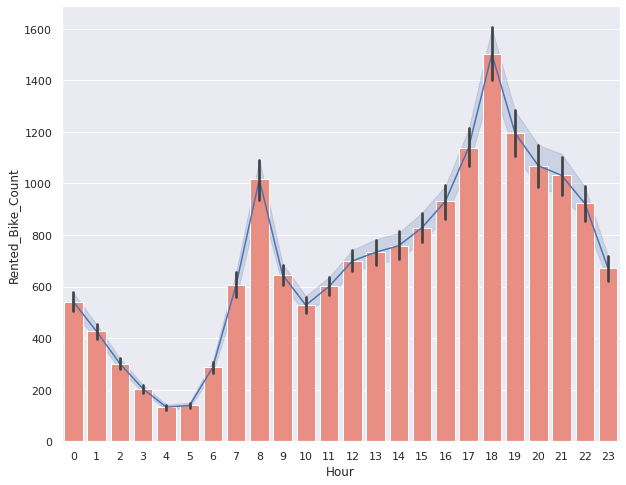

In [61]:
# bar plot between hr and rented bike count
plt.figure(figsize=(10,8))
sns.lineplot(x = bikes_data['Hour'],y = bikes_data['Rented_Bike_Count'])
sns.barplot(x = bikes_data['Hour'],y = bikes_data['Rented_Bike_Count'], color="salmon")


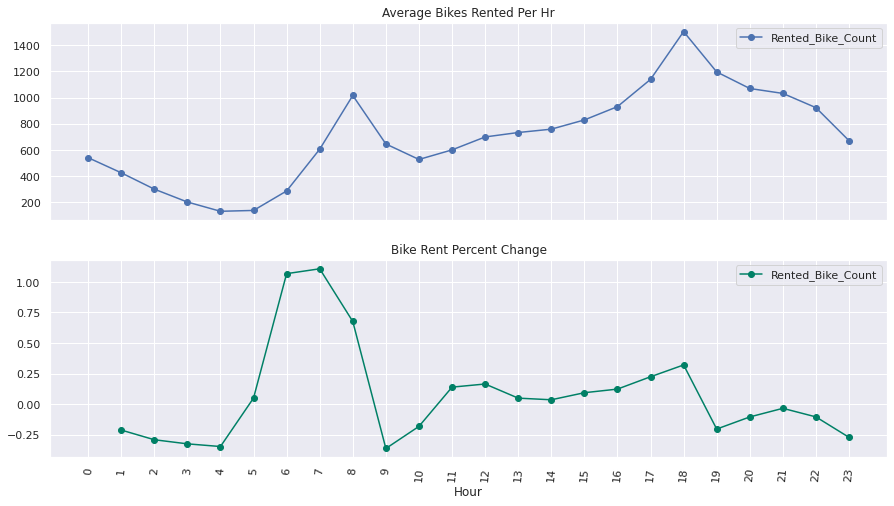

In [62]:
# group by Hrs and get average Bikes rented, and precent change
avg_rent_hrs = bikes_data.groupby('Hour')['Rented_Bike_Count'].mean()
pct_rent_hrs = bikes_data.groupby('Hour')['Rented_Bike_Count'].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average rent over time(hrs)
ax1 = avg_rent_hrs.plot(legend=True,ax=axis1,marker='o',title="Average Bikes Rented Per Hr")
ax1.set_xticks(range(len(avg_rent_hrs)))
ax1.set_xticklabels(avg_rent_hrs.index.tolist(), rotation=85)

# plot precent change for rent over time(hrs)
ax2 = pct_rent_hrs.plot(legend=True,ax=axis2,marker='o',rot=85,colormap="summer",title="Bike Rent Percent Change")
#ax1.set_xticks(range(len(avg_rent_hrs)))

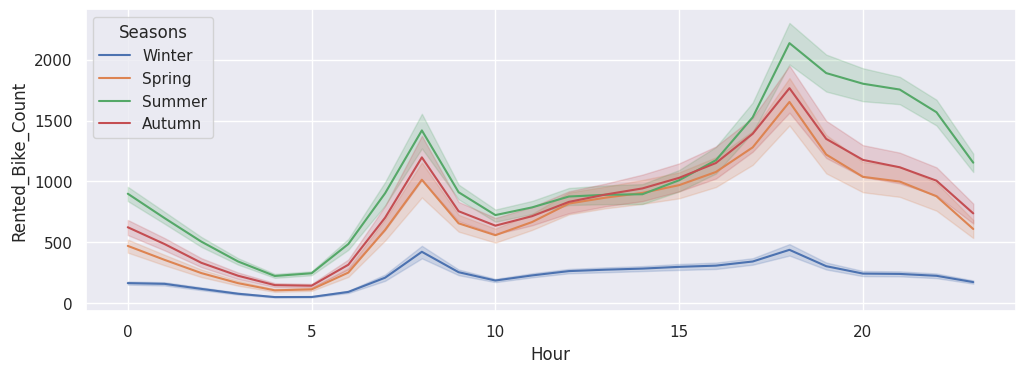

In [63]:
# line plot seasonal varaition
plt.figure(figsize=(12,4), dpi=100)
sns.lineplot(data=bikes_data, x="Hour", y="Rented_Bike_Count", hue="Seasons")

Customers prefer renting bikes more in summer and least in winter.
 

## **Relational Analysis-Finding correlation between different variables.**

In [64]:
#correlation data
np.round(bikes_data.corr()['Rented_Bike_Count'],3)

Rented_Bike_Count        1.000
Hour                     0.410
Temperature              0.539
Humidity                -0.200
Wind_speed               0.121
Visibility               0.199
Dew_point_temperature    0.380
Solar_Radiation          0.262
Rainfall                -0.123
Snowfall                -0.142
Year                     0.215
Day                      0.047
Month                    0.071
weekday                 -0.022
Name: Rented_Bike_Count, dtype: float64

Hour and Temperature are highly correlated with bike count

## **Dropping columns that are not required**

In [65]:
# dropping the non-perfoming column
bikes_data.drop('Months_string',axis=1,inplace=True)
bikes_data.drop('Date',axis=1,inplace=True)

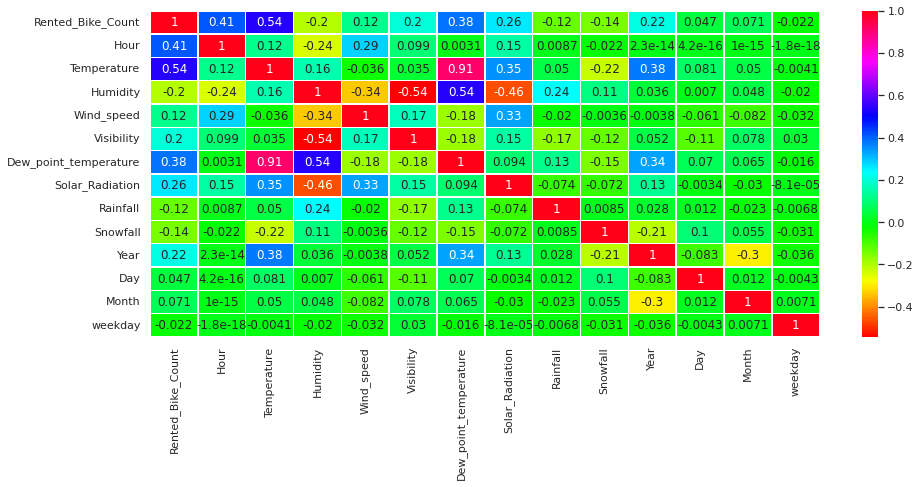

In [66]:
fig, ax = plt.subplots(figsize=(15,6))
dataplot = sns.heatmap(bikes_data.corr(), cmap="hsv", annot=True, linewidths=.5)
plt.show()

Temperature & dew points are highly coorelated .we can add them to make single column.

There is no multicollinerity in the data

In [67]:
# creating new  feature
bikes_data['Temperature_and_DP_Temp'] = [bikes_data['Temperature'][i]+bikes_data['Dew_point_temperature'][i] for i in range(len(bikes_data))]
bikes_data.drop(['Temperature','Dew_point_temperature'],axis=1,inplace=True)


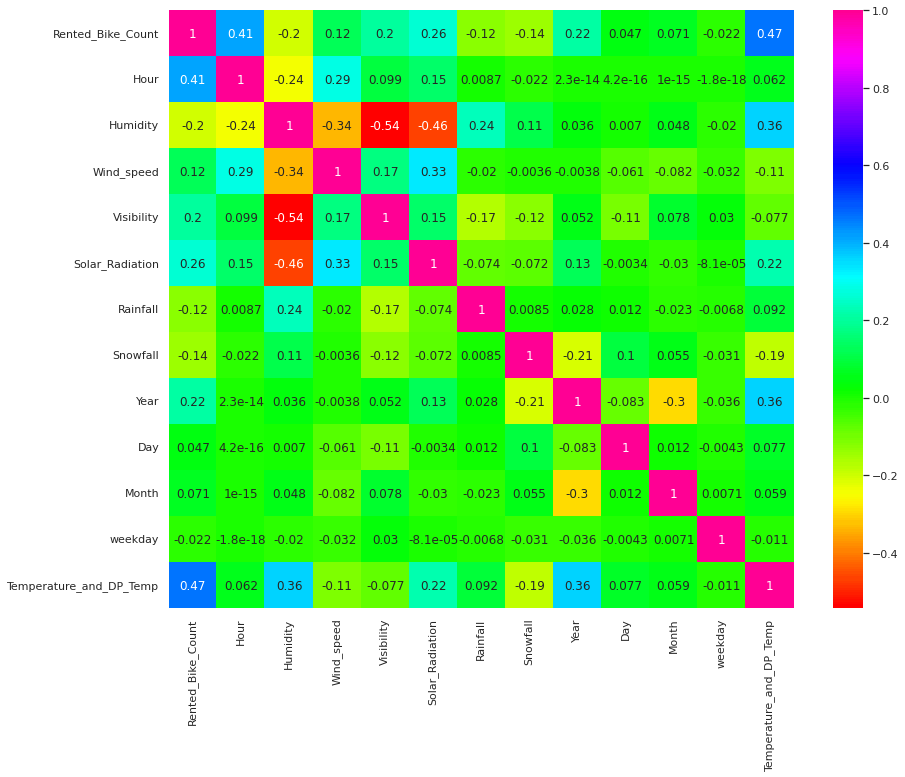

In [68]:
#correlation plot
corrmat = bikes_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(14,11))
#plot heat map
g=sns.heatmap(bikes_data[top_corr_features].corr(),annot=True,cmap="hsv",center=0.3)

In [69]:
#creating dummies column for the given feature
bikes_data=pd.get_dummies(bikes_data,drop_first=True)


In [70]:
# table after feature engineering
bikes_data.head()

,Rented_Bike_Count,Hour,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Year,Day,Month,weekday,Temperature_and_DP_Temp,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,254,0,37,2.2,2000,0.0,0.0,0.0,2017,12,1,4,-22.8,0,0,1,1,1
1,204,1,38,0.8,2000,0.0,0.0,0.0,2017,12,1,4,-23.1,0,0,1,1,1
2,173,2,39,1.0,2000,0.0,0.0,0.0,2017,12,1,4,-23.7,0,0,1,1,1
3,107,3,40,0.9,2000,0.0,0.0,0.0,2017,12,1,4,-23.8,0,0,1,1,1
4,78,4,36,2.3,2000,0.0,0.0,0.0,2017,12,1,4,-24.6,0,0,1,1,1


In [71]:
# removing less importance column
bikes_data.drop('weekday',axis=1,inplace=True)

In [72]:
bikes_data.head()

,Rented_Bike_Count,Hour,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Year,Day,Month,Temperature_and_DP_Temp,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning_Day_Yes
0,254,0,37,2.2,2000,0.0,0.0,0.0,2017,12,1,-22.8,0,0,1,1,1
1,204,1,38,0.8,2000,0.0,0.0,0.0,2017,12,1,-23.1,0,0,1,1,1
2,173,2,39,1.0,2000,0.0,0.0,0.0,2017,12,1,-23.7,0,0,1,1,1
3,107,3,40,0.9,2000,0.0,0.0,0.0,2017,12,1,-23.8,0,0,1,1,1
4,78,4,36,2.3,2000,0.0,0.0,0.0,2017,12,1,-24.6,0,0,1,1,1


In [73]:
# shape of the data
bikes_data.shape

(8760, 17)

##**Model Building**

In [74]:
# Data for all the independent variables
X = bikes_data.drop(labels='Rented_Bike_Count',axis=1)

# Data for the dependent variable

y = np.sqrt(bikes_data['Rented_Bike_Count'])
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [75]:
# Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [76]:
print(model.feature_importances_)


[0.26742354 0.11755655 0.01338208 0.03098551 0.05808274 0.03291139
 0.00250956 0.00131655 0.01786628 0.01637066 0.06763902 0.01691879
 0.00982705 0.18194059 0.0053853  0.15988439]


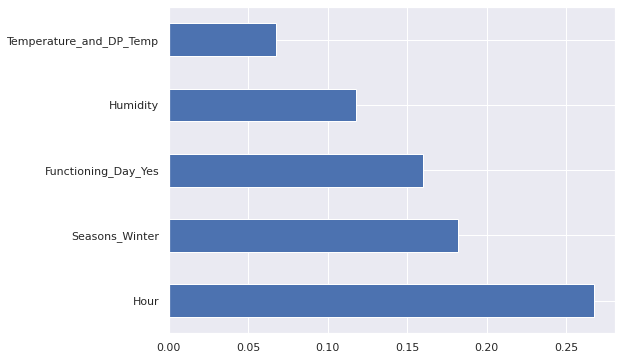

In [77]:

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

## **Train Test Split Model**

In [78]:
#import train-test split lib
from sklearn.model_selection import train_test_split

In [79]:
# function which split data into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=34)

In [80]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(7008, 16) (7008,)
(1752, 16) (1752,)


## **Analyzing distribution of independent variables**

In [81]:
bikes_data.columns

Index(['Rented_Bike_Count', 'Hour', 'Humidity', 'Wind_speed', 'Visibility',
       'Solar_Radiation', 'Rainfall', 'Snowfall', 'Year', 'Day', 'Month',
       'Temperature_and_DP_Temp', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes'],
      dtype='object')

In [82]:
# defining independent variables separately

continuous_var = ['Temperature_and_DP_Temp', 'Humidity', 'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall']

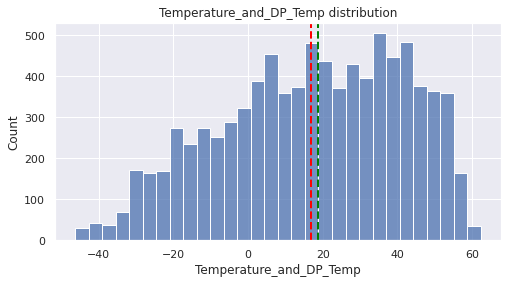

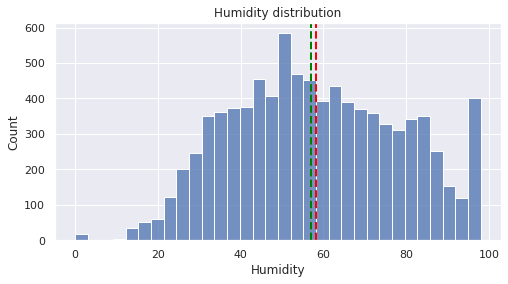

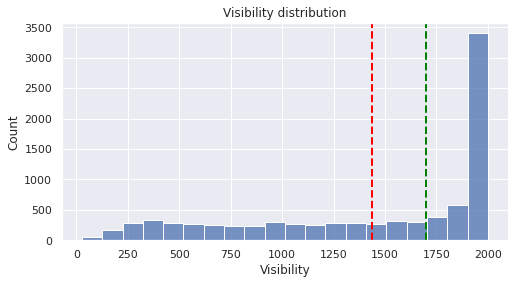

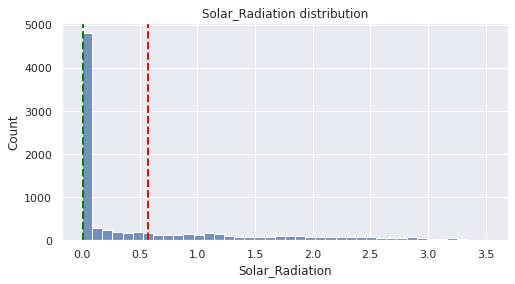

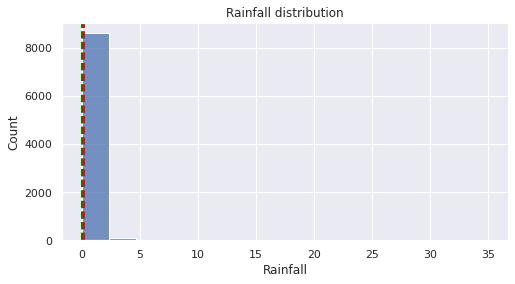

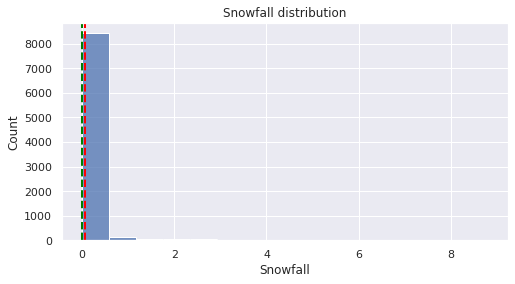

In [83]:
# Analyzing distribution of continuous independent variables

for col in continuous_var:
  plt.figure(figsize=(8,4))
  sns.histplot(bikes_data[col])
  plt.axvline(bikes_data[col].mean(), color='red', linestyle='dashed', linewidth=2)
  plt.axvline(bikes_data[col].median(), color='green', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

**Normally distributed :** temperature, humidity.

**Positively/Left skewed :** wind, solar_radiation, snowfall, rainfall.

**Negatively/Right skewed :** visibility

In [84]:
# defining dependent variable

dependent_variable = ['Rented_Bike_Count']

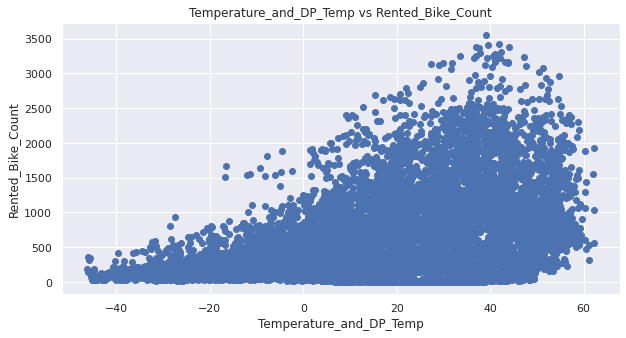

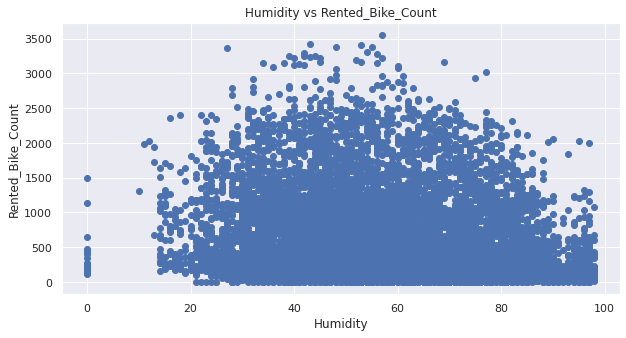

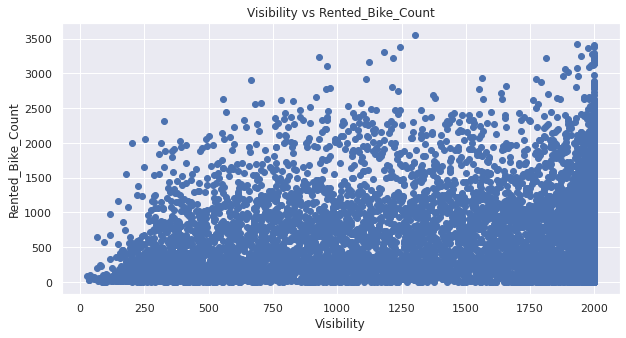

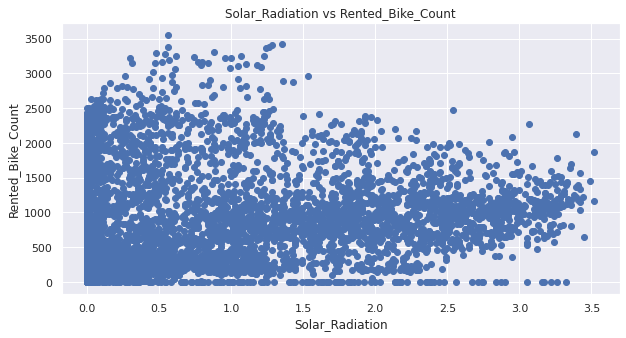

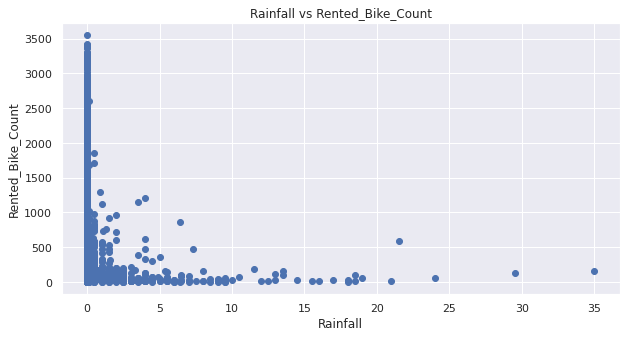

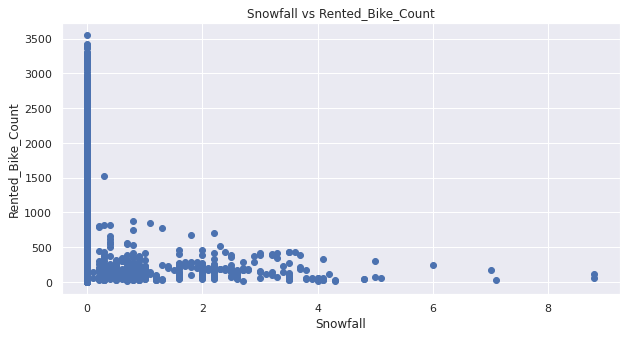

In [85]:
# Analyzing relationship between the dependent variable and independent continuous variables

for i in continuous_var:
  plt.figure(figsize=(10,5))
  plt.scatter(x=i,y=dependent_variable[0],data=bikes_data)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

The dependent variable is positively skewed. To get better predictions, it is ideal if the dependent variable is almost normally distributed. To achieve this, we can transform the data by log and square root transformation

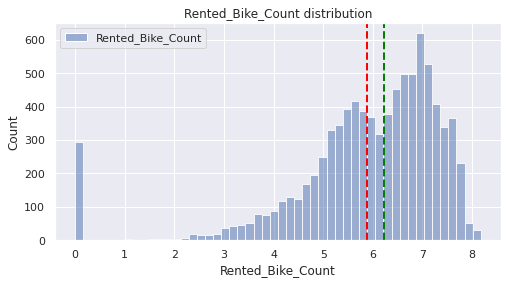

In [86]:
# visualizing dependent variable after log transformation

plt.figure(figsize=(8,4))
sns.histplot(np.log1p(bikes_data[dependent_variable]))
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(np.log1p(bikes_data['Rented_Bike_Count']).mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(bikes_data['Rented_Bike_Count']).median(), color='green', linestyle='dashed', linewidth=2)

In [87]:
# skewness after log transformation

np.log1p(bikes_data[dependent_variable]).skew()

Rented_Bike_Count   -1.832199
dtype: float64

So, we have 1.153428 when it was left skewed and -1.832199 after Log Transformation which means

**Skewness' magnitude increases on performing log transformation.**

## **Square-root transformation**

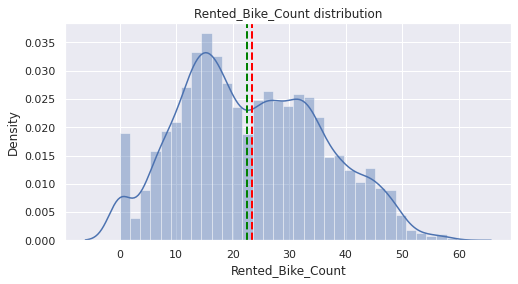

In [88]:
# visualizing after square root transformation

plt.figure(figsize=(8,4))
sns.distplot(np.sqrt(bikes_data[dependent_variable]))
plt.xlabel(dependent_variable[0])
plt.title(dependent_variable[0]+' distribution')
plt.axvline(np.sqrt(bikes_data['Rented_Bike_Count']).mean(), color='red', linestyle='dashed', linewidth=2)
plt.axvline(np.sqrt(bikes_data['Rented_Bike_Count']).median(), color='green', linestyle='dashed', linewidth=2)

In [89]:
# skewness after sqrt transformation

np.sqrt(bikes_data[dependent_variable]).skew()

Rented_Bike_Count    0.237362
dtype: float64

So, we have 1.153428 when it was left skewed and 0.237362 after sqrt Transformation which means

**Skewness' magnitude reduces on performing sqrt transformation. Hence we can use square root transformation during the modelling. It removed outliers as well.**

# **Linear Regression Model**

Given below are the basic assumptions that a linear regression model makes regarding a dataset on which it is applied-

* **Linear relationship**: 

* **Little or no multi-collinearity**: 

* **Little or no auto-correlation**:

* **Homoscedasticity**:

In [90]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression().fit(X_train, y_train)

In [91]:
# all coeffient
reg.score(X_train, y_train)

0.6547192361864398

In [92]:
#diffresnt coefficient for different features
reg.coef_

array([ 4.87925477e-01, -2.29940503e-01,  1.89672962e-01, -1.56414191e-04,
       -8.02486527e-01, -1.39558289e+00,  1.86527269e-01, -2.64795650e+00,
       -1.86084876e-02, -2.30326900e-02,  2.47906155e-01, -2.89868003e+00,
       -2.84332142e+00, -9.04145095e+00,  2.85999149e+00,  2.84894893e+01])

In [93]:
# pred train test
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)

In [94]:
#metrics for linear regession analysis
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)




from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 52.95555328513579
RMSE : 7.277056636108846
R2 : 0.6547192361864398
Adjusted R2 : 0.6515350908140958


In [95]:
#metrics for linear regession analysis
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)




from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 52.95555328513579
RMSE : 7.277056636108846
R2 : 0.6547192361864398
Adjusted R2 : 0.6515350908140958


In [96]:
#metrics for linear regression analysis for test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_test, y_pred_test)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 55.08739505098528
RMSE : 7.42208832142176
R2 : 0.6588467149667645
Adjusted R2 : 0.6557006327993111


In [97]:
#metrics for linear regression analysis for test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_test, y_pred_test)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 55.08739505098528
RMSE : 7.42208832142176
R2 : 0.6588467149667645
Adjusted R2 : 0.6557006327993111


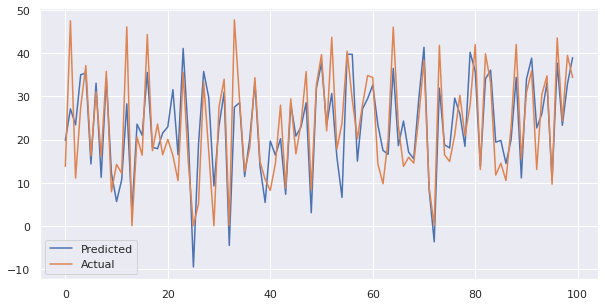

In [99]:
#predicted vs actual for test data
plt.figure(figsize=(10,5))
plt.plot(np.array(y_pred_test)[:100])
plt.plot(np.array((y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

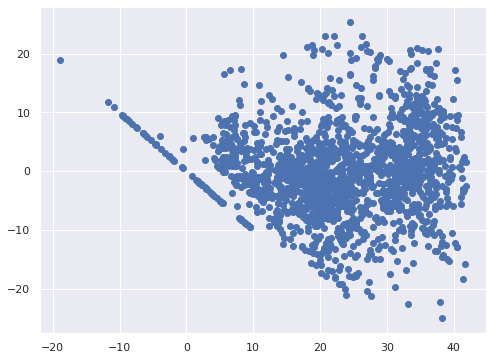

In [100]:
# Heteroscedasticity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

## **Lasso Regression**

In [101]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.1,max_iter=3000)
lasso.fit(X_train,y_train)

Lasso(alpha=0.1, max_iter=3000)

In [102]:
# lasso score 
lasso.score(X_train, y_train)

0.6436819185266032

In [103]:
# lasso y pred test and train
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [104]:
# metrics for lasso regressor flor train dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 54.64834166119503
RMSE : 7.392451667829492
R2 : 0.6436819185266032
Adjusted R2 : 0.6403959880922664


In [105]:
# mterics for lasso regressor flor test dataset
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_lasso))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_lasso)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 57.49564641514416
RMSE : 7.582588371733241
R2 : 0.643932543343507
Adjusted R2 : 0.6406489241466748


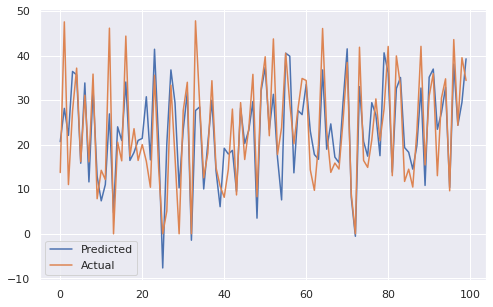

In [107]:
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test_lasso)[:100])
plt.plot(np.array((y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

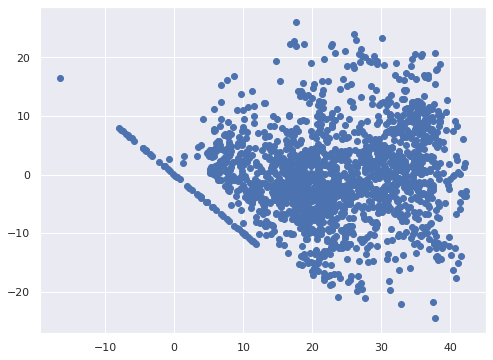

In [108]:
# Heteroscedasticity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

## **Ridge Regresion**

In [109]:
#importing ridge regression
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [110]:
# ridge score
ridge.score(X_train, y_train)

0.6547191910419368

In [111]:
#y pred  ridge test and train
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [112]:
# metrics for ridge regression
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 52.955560208927636
RMSE : 7.277057111836325
R2 : 0.6547191910419368
Adjusted R2 : 0.6515350452532745


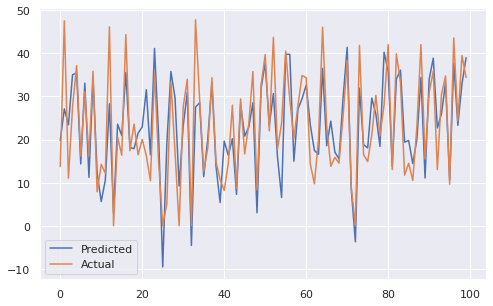

In [114]:
#plot for ridge 
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_ridge)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

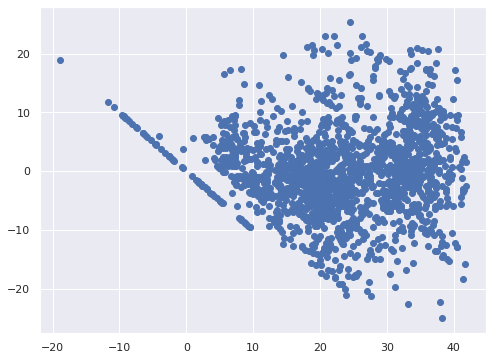

In [115]:
# Heteroscedasticity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

## **Elastic Net Regressor**

In [116]:
#importing elasticNet model
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)
#a*l1+b*l2
#alpha=a+b and l1 ratio=a/a+b
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [117]:
#elastic net score

elasticnet.score(X_train, y_train)

0.5801724303474118

In [118]:
#y_predict for train and test dataset
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [119]:
#metrics for the elasticnet regression on train
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_en)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 64.38876290053423
RMSE : 8.024260894346234
R2 : 0.5801724303474118
Adjusted R2 : 0.5763008216359182


In [120]:
#metrics for the elasticnet regression on test
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error((y_test), (y_pred_test_en))
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_en)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 67.17969621593292
RMSE : 8.196322115188796
R2 : 0.5839597419629589
Adjusted R2 : 0.5801230594680928


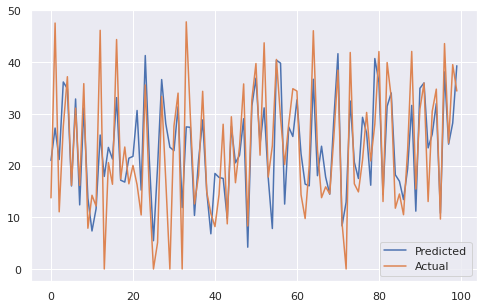

In [121]:
#plot for pred vs actual for test
plt.figure(figsize=(8,5))
plt.plot(np.array(y_pred_test_en)[:100])
plt.plot((np.array(y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

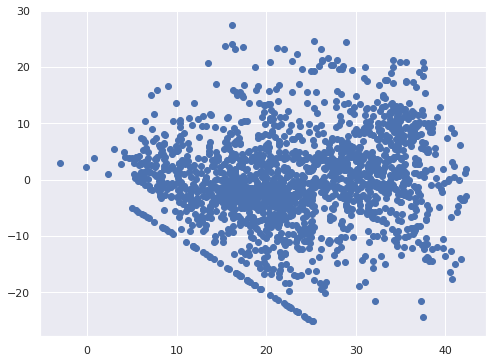

In [122]:
#Heteroscedasticity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

## **Desicion tree by using desicion tree regressor**

In [123]:
#importing the decision tree model for training 
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [124]:
#y pred for test and train data
y_pred_train_dt = decision_regressor.predict(X_train)
y_pred_test_dt = decision_regressor.predict(X_test)

In [125]:
#metric for decison tree for train data
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_dt)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8353707411856776
MSE : 25.249114347249602
RMSE : 5.024849684045245
R2 : 0.8353707411856776
Adjusted R2 : 0.8338525462917126


In [126]:
#metric for decison tree for test data
from sklearn.metrics import mean_squared_error
MSE= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

from sklearn.metrics import r2_score
r2= r2_score((y_test), (y_pred_test_dt))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 32.916714111849544
RMSE : 5.737308960815127
R2 : 0.7961485537414882
Adjusted R2 : 0.7942686556780092


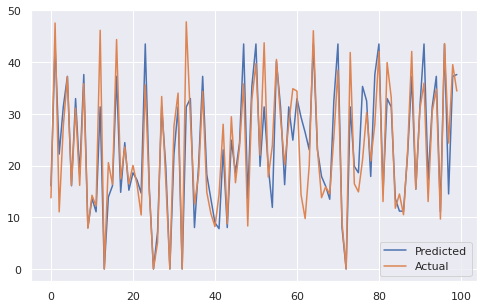

In [128]:
#pred vs actual for decision tree
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_dt)[:100]))
plt.plot(np.array((y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

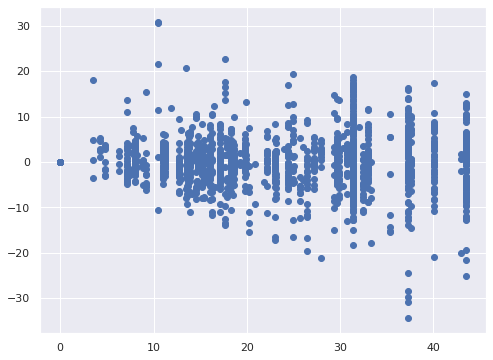

In [129]:
# Heteroscedasticity
plt.scatter((y_pred_test_dt),(y_test)-(y_pred_test_dt))

## **Implementing Random Forest Regressor**


In [130]:
#creating an instance for the random forest
rf_model=RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [131]:
# Making predictions on train and test data in rf

y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [132]:
#metric score for the rf for train dataset
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9871560471934615
MSE : 1.969871184615669
RMSE : 1.4035209954310155
R2 : 0.9871560471934615
Adjusted R2 : 0.9870376015191649


In [133]:
#metric score for the rf for test dataset
print("Model Score:",rf_model.score(X_test,y_test))

MSE= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_rf)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9087910149265869
MSE : 14.727882196558769
RMSE : 3.8376923009223614
R2 : 0.9087910149265869
Adjusted R2 : 0.9079498946031432


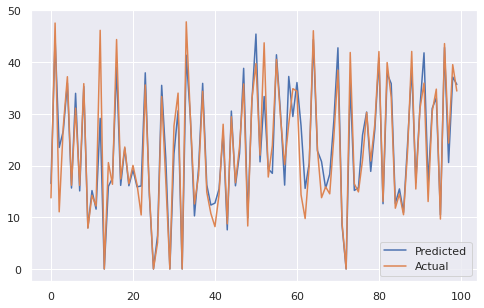

In [135]:
#pred vs actual for random forest
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_rf)[:100]))
plt.plot(np.array((y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

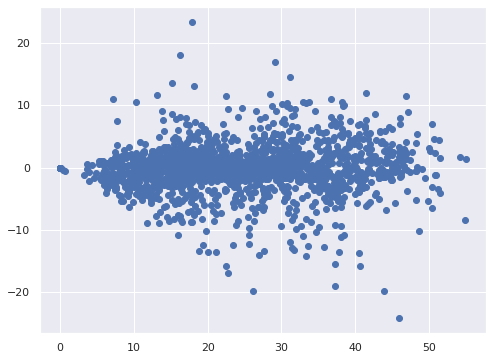

In [136]:
#Heteroscedasticity
plt.scatter((y_pred_test_rf),(y_test)-(y_pred_test_rf))

In [137]:
# random forest important feature selection
rf_model.feature_importances_

array([0.2871728 , 0.13750458, 0.01308946, 0.01503541, 0.02382936,
       0.0354547 , 0.00158083, 0.0010881 , 0.01807215, 0.01135735,
       0.09799502, 0.00565938, 0.00453703, 0.18000569, 0.00253942,
       0.1650787 ])

In [138]:
importance_rf=rf_model.feature_importances_

In [139]:
imortance_rf_dict={"Feature":list(X_train.columns),"Feature importance":importance_rf}
imortance_rf_df=pd.DataFrame(imortance_rf_dict)

In [140]:
imortance_rf_df["Feature importance"]=round(imortance_rf_df["Feature importance"],2)

In [141]:
imortance_rf_df.sort_values(by=["Feature importance"],ascending=False)


,Feature,Feature importance
0,Hour,0.29
13,Seasons_Winter,0.18
15,Functioning_Day_Yes,0.17
1,Humidity,0.14
10,Temperature_and_DP_Temp,0.10
5,Rainfall,0.04
3,Visibility,0.02
4,Solar_Radiation,0.02
8,Day,0.02
2,Wind_speed,0.01


In [142]:
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [143]:
features=X_train.columns
importance_rf=rf_model.feature_importances_
indices=np.argsort(importance_rf)

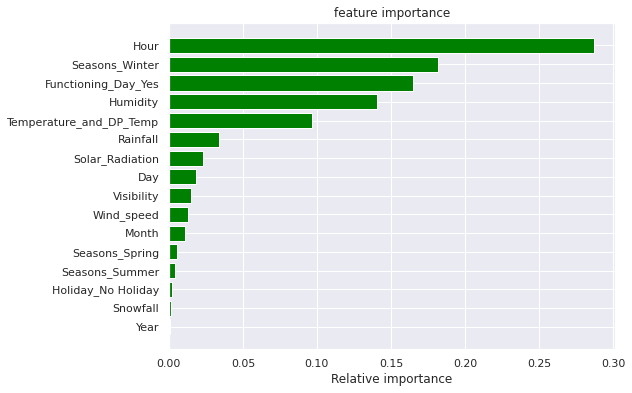

In [144]:
plt.title("feature importance")
plt.barh(range(len(indices)),importance_rf[indices],color="green",align="center")

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative importance") 
plt.show()         

## **Training Random Forest Regressor**

In [145]:
# number of trees
n_estimators=[50,80,100]

#max deapth of tree
max_depth=[4,6,8]

#minimum no of sample required for spliting the node
min_samples_split=[50,100,150]

#minimum no of sample required at each leaf node
min_samples_leaf=[40,50]
#hyper parametr gride
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}


In [ ]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

## **Importing Random Forest Regressor**

In [146]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

# Grid search
rf_grid = GridSearchCV(estimator=rf_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.7s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [147]:
rf_grid.best_estimator_

RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50,
                      n_estimators=80)

In [148]:
rf_optimal_model = rf_grid.best_estimator_

In [149]:
rf_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 80}

In [150]:
# Making predictions on train and test data

y_pred_train_r_g = rf_optimal_model.predict(X_train)
y_pred_test_r_g = rf_optimal_model.predict(X_test)

In [151]:
#metrics for rf score with gd for train
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_train, y_pred_train_r_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_train, y_pred_train_r_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8432640306252952
MSE : 24.03852414553082
RMSE : 4.902909763143803
R2 : 0.8432640306252952
Adjusted R2 : 0.8418186268731366


In [152]:
#metrics for rf score with gd for test
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_optimal_model.score(X_train,y_train))

MSE= mean_squared_error(y_test, y_pred_test_r_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)


from sklearn.metrics import r2_score
r2= r2_score(y_test, y_pred_test_r_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_r_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8432640306252952
MSE : 27.151024805246102
RMSE : 5.210664526262088
R2 : 0.8318551585938007
Adjusted R2 : 0.8303045433416397


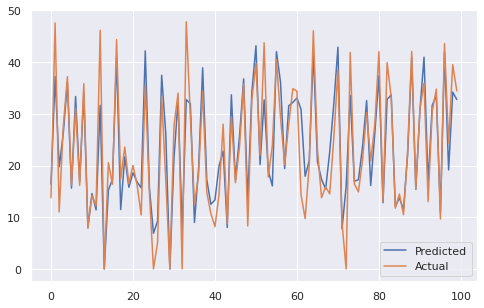

In [153]:
#pred vs actual for random forest
plt.figure(figsize=(8,5))
plt.plot((np.array(y_pred_test_r_g)[:100]))
plt.plot(np.array((y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

In [154]:
# for the important features
rf_optimal_model.feature_importances_

array([3.13199333e-01, 1.53752685e-01, 2.30175816e-04, 1.48422216e-03,
       5.52846127e-03, 1.83202476e-02, 2.62415317e-04, 9.38094288e-04,
       3.89910662e-03, 9.84152076e-04, 8.82265377e-02, 2.65990801e-03,
       4.94613034e-03, 2.14661341e-01, 4.47764198e-04, 1.90459426e-01])

In [155]:
#important feature selection
importance_rf_gd=rf_optimal_model.feature_importances_
imortance_rf_gddict={"Feature":list(X_train.columns),"Feature importance":importance_rf_gd}
imortance_rf_gddf=pd.DataFrame(imortance_rf_gddict)

In [156]:
imortance_rf_gddf['Feature importance'] = round(imortance_rf_gddf['Feature importance'],2)

In [157]:
#reading table of important features
imortance_rf_gddf.head()

,Feature,Feature importance
0,Hour,0.31
1,Humidity,0.15
2,Wind_speed,0.00
3,Visibility,0.00
4,Solar_Radiation,0.01


In [158]:
#featuer in ascending order
imortance_rf_gddf.sort_values(by=["Feature importance"],ascending=False)

,Feature,Feature importance
0,Hour,0.31
13,Seasons_Winter,0.21
15,Functioning_Day_Yes,0.19
1,Humidity,0.15
10,Temperature_and_DP_Temp,0.09
5,Rainfall,0.02
4,Solar_Radiation,0.01
2,Wind_speed,0.00
3,Visibility,0.00
6,Snowfall,0.00


In [159]:
rf_optimal_model.fit(X_train,y_train)

RandomForestRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50,
                      n_estimators=80)

In [160]:
features=X_train.columns
importance_rfgd=rf_optimal_model.feature_importances_
indices=np.argsort(importance_rfgd)

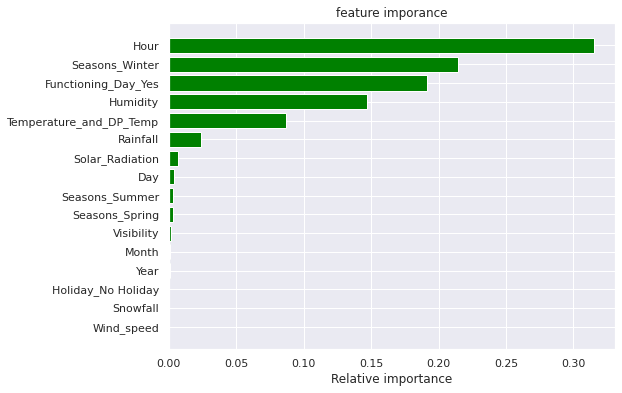

In [161]:
#barh plot for important features 
plt.title("feature imporance")
plt.barh(range(len(indices)),importance_rfgd[indices],color="green",align="center")

plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel("Relative importance") 
plt.show()  

## **Implementing XgBoost Regressor**

In [162]:
# Create an instance of the RandomForestRegressor
import xgboost as xgb
xg_model = xgb.XGBRegressor()


xg_model.fit(X_train,y_train)

[03:57:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [163]:
# Making predictions on train and test data

y_pred_train_xg = xg_model.predict(X_train)
y_pred_test_xg = xg_model.predict(X_test)

In [164]:
#xg boost on train data
print("Model Score:",xg_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_xg)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score(y_train, y_pred_train_xg)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_xg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8802274395883487
MSE : 18.3694629695651
RMSE : 4.285961148863239
R2 : 0.8802274395883487
Adjusted R2 : 0.8791229087718724


In [165]:
#Xg boost for test
MSE= mean_squared_error(y_test, y_pred_test_xg)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_xg))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_xg)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 21.012567484151045
RMSE : 4.583946714802763
R2 : 0.8698702957806231
Adjusted R2 : 0.868670252398773


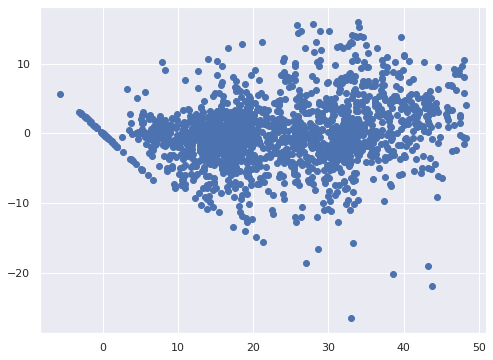

In [166]:
#Heteroscedasticity
plt.scatter((y_pred_test_xg),(y_test)-(y_pred_test_xg))

# **Training XgBoost Regressor**

##Provide the range for hyperparameters

In [167]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,'learning_rate': [0.1, 0.05, 0.01, 0.005]}

In [168]:
import xgboost as xgb
xg_model = xgb.XGBRegressor()


xg_model.fit(X_train,y_train)

[03:58:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [169]:
# Grid search
xg_grid = GridSearchCV(estimator=xg_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

xg_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[03:58:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[03:58:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[03:58:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[03:58:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[03:58:04] WARNING: /works

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [170]:
xg_grid.best_estimator_

XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [171]:
xg_optimal_model = xg_grid.best_estimator_

In [172]:
xg_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [173]:
# Making predictions on train and test data

y_pred_train_x_g = xg_optimal_model.predict(X_train)
y_pred_test_x_g  = xg_optimal_model.predict(X_test)

In [174]:
#xg after training score for train data
print("Model Score:",xg_optimal_model.score(X_train,y_train))
MSE= mean_squared_error(y_train, y_pred_train_x_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)
r2= r2_score(y_train, y_pred_train_x_g)
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_x_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9770309205417014
MSE : 3.522757241759442
RMSE : 1.8769009674885466
R2 : 0.9770309205417014
Adjusted R2 : 0.9768191019415096


In [175]:
#Xg boost  after training for test
print("Model Score:",xg_optimal_model.score(X_train,y_train))
MSE= mean_squared_error(y_test, y_pred_test_x_g)
print("MSE :",MSE)

RMSE=np.sqrt(MSE)
print("RMSE :",RMSE)

r2= r2_score((y_test), (y_pred_test_x_g))
print("R2 :",r2)
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_x_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9770309205417014
MSE : 13.00960734058643
RMSE : 3.6068833278311665
R2 : 0.9194321990152959
Adjusted R2 : 0.9186892106488664


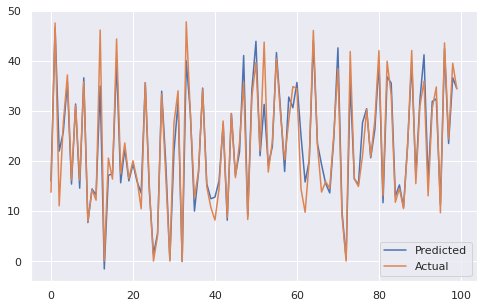

In [178]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_test_x_g)[:100])
plt.plot(np.array((y_test)[:100]))
plt.legend(["Predicted","Actual"])
plt.show()

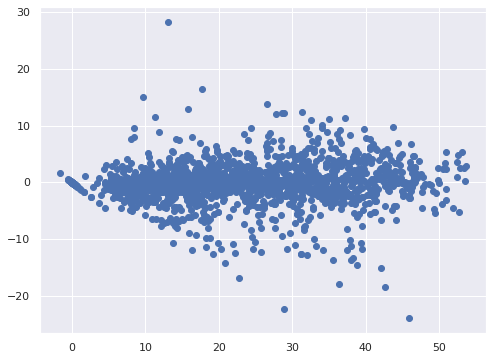

In [177]:
### Heteroscadacity
plt.scatter((y_pred_test_x_g),(y_test)-(y_pred_test_x_g))

# **Model Summary for Train Data Set**

In [179]:
from prettytable import PrettyTable
train = PrettyTable(['SL NO',"MODEL_NAME", "Train MSE", "Train RMSE",'Train R^2','Train Adjusted R^2'])
train.add_row(['1','Linear Regression','52.95555328513579',' 7.277056636108846','0.6547192361864398',' 0.651535090814095'])
train.add_row(['2','lasso Regression','54.64834166119503','7.392451667829492','0.6436819185266032','0.6403959880922664'])
train.add_row(['3','Ridge Regression','52.955560208927636','7.277057111836325','0.6547191910419368','0.6515350452532745'])
train.add_row(['4','Elastic net regressor','64.38876290053423','8.024260894346234','0.5801724303474118','0.5763008216359182'])
train.add_row(['5','Decision Tree regressor','28.409014527459313','5.330010743653273','0.8147675621022166','.8130593667094993'])
train.add_row(['6','Random forest regressor','24.007196716801857','4.899713942344171','0.8434682917055565','0.842024771629066'])
train.add_row(['7','Gradient Boost','8.001689449028063','2.8287257641963217','0.9478273897001314','0.9473462589999597'])
train.add_row(['8','XGBoost','3.522757241759442','1.8769009674885466','0.9770309205417014','0.9768191019415096'])
print(train)

+-------+-------------------------+--------------------+--------------------+--------------------+--------------------+
| SL NO |        MODEL_NAME       |     Train MSE      |     Train RMSE     |     Train R^2      | Train Adjusted R^2 |
+-------+-------------------------+--------------------+--------------------+--------------------+--------------------+
|   1   |    Linear Regression    | 52.95555328513579  |  7.277056636108846 | 0.6547192361864398 |  0.651535090814095 |
|   2   |     lasso Regression    | 54.64834166119503  | 7.392451667829492  | 0.6436819185266032 | 0.6403959880922664 |
|   3   |     Ridge Regression    | 52.955560208927636 | 7.277057111836325  | 0.6547191910419368 | 0.6515350452532745 |
|   4   |  Elastic net regressor  | 64.38876290053423  | 8.024260894346234  | 0.5801724303474118 | 0.5763008216359182 |
|   5   | Decision Tree regressor | 28.409014527459313 | 5.330010743653273  | 0.8147675621022166 | .8130593667094993  |
|   6   | Random forest regressor | 24.0

# **Model Summary for Test Data set**

In [180]:
from prettytable import PrettyTable
test = PrettyTable(['SL NO',"MODEL_NAME", "Test MSE", "Test RMSE",'Test R^2','Test Adjusted R^2'])
test.add_row(['1','Linear Regression','55.08739505098533','7.4220883214217634','0.6588467149667641','0.6557006327993107'])
test.add_row(['2','lasso Regression', '57.49564641514416','7.582588371733241','0.643932543343507','0.6406489241466748'])
test.add_row(['3','Ridge Regression','55.08773606712857','7.422111294445036','0.6588446030720665','0.655698501428'])
test.add_row(['4','Elastic net regressor','67.17969621593292','8.196322115188796','0.5839597419629589','0.5801230594680928'])
test.add_row(['5','Decision Tree regressor','32.217717802173574','5.676065345128928','0.8004774004232265','0.7986374225596943'])
test.add_row(['6','Random forest regressor','26.998863153577467','5.196043028457084','0.8327974875471809','0.8312555623602961'])
test.add_row(['7','Gradient Boost','14.1788868387969','3.7654862685710233','0.9121909137527177','0.9113811469631173'])
test.add_row(['8','XGBoost','13.00960734058643','3.6068833278311665','0.9194321990152959','0.9186892106488664'])
print(test)

+-------+-------------------------+--------------------+--------------------+--------------------+--------------------+
| SL NO |        MODEL_NAME       |      Test MSE      |     Test RMSE      |      Test R^2      | Test Adjusted R^2  |
+-------+-------------------------+--------------------+--------------------+--------------------+--------------------+
|   1   |    Linear Regression    | 55.08739505098533  | 7.4220883214217634 | 0.6588467149667641 | 0.6557006327993107 |
|   2   |     lasso Regression    | 57.49564641514416  | 7.582588371733241  | 0.643932543343507  | 0.6406489241466748 |
|   3   |     Ridge Regression    | 55.08773606712857  | 7.422111294445036  | 0.6588446030720665 |   0.655698501428   |
|   4   |  Elastic net regressor  | 67.17969621593292  | 8.196322115188796  | 0.5839597419629589 | 0.5801230594680928 |
|   5   | Decision Tree regressor | 32.217717802173574 | 5.676065345128928  | 0.8004774004232265 | 0.7986374225596943 |
|   6   | Random forest regressor | 26.9

## **From EDA we observed:**


*   There is less demand of rented bike during winter season and most demand in
summer.
*   From 5 AM rented bike demand starts to rise and after 6 PM demand starts to decrease.
* 8 AM and 6 PM is peak hour so we can say that during office opening and closing time there is high demand.  
*   Rainfall and snowfall also play an important factor in bike renting demand, as rainfall and snowfall increase demand decreases.

*   People tend to rent bikes when there is no or less rainfall.
*   Sligthly Higher demand during Non holidays

*   Almost no demnad on non functioning day













## **Conclusion:**



*  We observed that after doing EDA ,applying LINEAR REGRSSION model didnt went well - 65% accuracy

*   Linear model, Lasso model, Ridge model, and Elasticnet model have Adjusted-R2 value below 60 on both training and test data.
*   According to Decision tree and random forest tests, temperature is the most important feature and has the highest impact on rented bike demand.
*   As we see,Rented bike count was low till november 2017,after that there was growth in buisness of rented bikes 
*   According to Gradient Boosting, temperature is the most important feature and has the highest impact on rented bike demand.
*  We see that after doing EDA ,applying LINEAR REGRSSION model didnt went well with only 65% accuracy.
* LASSO & RIDGE REGRESSION helps to reduce model complexity and prevented over-fitting which may have been resulted from simple regression.
* With LASSO,RIDGE & ElasticNet Regressor we got RSquared value as 0.64,0.65,0.68 respectively.
* with decision tree we reached at the model having  R squared value as 0.80.
* Random forest Regressor  gave R squared value of 0.83 on test data.
* XgBoost help us to get best accuracy to approximate number of Rented Bikes demand.


*  XgBoost gave best result of training R square of 0.97 and test R square value of 0.919 also with adjusted R-square of 0.918 






